<center>
    <h1>進階 Python</h1>
    <h3>用 Python 簡單打造一個屬於自己的投資分析 App</h3>
    <h3>Part II - Python 善用 Package 和資料分析工具</h3>
</center>


<h2>目錄</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            Yahoo! Finance
        </li>
     </ul>
    <ul>
        <li>
            Pandas
            <ul>
                <li>DataFrame 是什麼？</li>
                <li>折線圖</li>
                <li>直條圖</li>
            </ul>
        </li>
     </ul>
    <ul>
        <li>
            matplotlib 繪圖套件
            <ul>
                <li>折線圖</li>
                <li>直條圖</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
        實作
        <ul>
        <li>歷年股價製圖（已校正，可當作回測線）</li>
        <li>年度報酬率製圖</li>
    </li>
         </ul>
    
</div>

可能看起來會覺得「啊.. 怎麼這麼多..」，確實很多，但很多程式碼卻也非常直觀。在這裡我們會看到如何使用其他人早已經製作好的 functions 以及我們該怎麼使用它們。

重點是要給同學一個概念 —— Python 之所以受人喜愛，其中一個原因即為很多很方便的 packages。章節中如果出現問題，想要深入瞭解的話，皆有許多資源可以參考。

<hr>

待會在本章節中，我們除了看到可以怎麼使用 package 獲得我們需要的資訊以外，在某些環節，我們會帶著大家看看這些資訊如果要自己手動寫成函式的話會有什麼問題以及挑戰。

在進入本章節之前，大家要知道，用 Python 做資料分析遠比上面單純所提到的畫圖還要來得多。在這邊我們就簡單介紹一下待會做 App 會用到的畫圖方式以及技巧。如果還有興趣的同學，也可以參考其他書籍或網路相關文章。

事實上，系上的統計課，正式在教大家如何以 Python 做統計分析，裡頭也有很多製圖或是分析相關工具的介紹。

In [6]:
from bs4 import BeautifulSoup
import time
from datetime import datetime
import requests 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pws

# 在 Jupyter Notebook 中，只要有加上下面這行，就可以直接在裡面畫圖
%matplotlib inline

先來看看 [Yahoo! Finance](https://finance.yahoo.com) 吧。雖然不是看台股最精確的地方，但本課先暫時用此平台來解決現在我們欲解決的問題——如何快速的取得股價資訊。

此平台除了台股以外，也可以看到國外其他股票資訊。

有些善心人士有幫我們寫好了一系列的 Python packages，幫我們把很多複雜的程式碼包裝成 functions 的形式，我們這時只要 import 他們所建構的套件即可。

以下，我們就示範一下利用 `yfinance` 套件快速將資料下載下來的例子。這麼一來，我們便不用再辛苦地去瀏覽網站找閱資料了。

In [8]:
stock_id = '2330.TW'
stock_obj = yf.Ticker(stock_id)
# stock_obj
# stock_df = stock_obj.history(start='2011-3-12', end='2021-3-12', auto_adjust=False)
# type(stock_df)

`yfinance` 也可以幫助我們取得「即時」的股價：

In [12]:
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# real_time_data = stock_obj.history(period='1d', interval='1m', auto_adjust=False).sort_index(ascending=False).head(1)
real_time_data = stock_obj.history(period='1mo', interval='1d').sort_index(ascending=False)
real_time_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-21,644.0,646.0,637.0,641.0,50994049,0,0
2022-01-20,650.0,657.0,646.0,651.0,46474584,0,0
2022-01-19,652.0,660.0,651.0,654.0,40381333,0,0
2022-01-18,678.0,681.0,662.0,662.0,43593330,0,0
2022-01-17,685.0,688.0,678.0,683.0,59614236,0,0
2022-01-14,673.0,673.0,661.0,672.0,95200777,0,0
2022-01-13,658.0,662.0,655.0,661.0,38137411,0,0
2022-01-12,657.0,660.0,650.0,660.0,38860063,0,0
2022-01-11,646.0,651.0,639.0,651.0,33196585,0,0


In [20]:
real_time_data = stock_obj.history(period='1d', interval='1m').sort_index(ascending=False).head(1)
real_time_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-01-21 13:30:00+08:00,641.0,641.0,641.0,641.0,0,0,0


<!-- 如果查詢開盤中且 13:25 以前的價格，我們都可以透過以上方式取得即時價格。但一但超過 13:25 的話，就要記得用當天的收盤價格。我們等等會跟大家解釋要怎麼取出這個資訊。 -->

### DataFrame

我們直接就拿上面 `stock_df` 來介紹 `DataFrame` 吧。這是一個來自於另一個套件，`pandas`，的實用 data type。它的功能有點像 Excel。我們來看看以下的例子：

In [28]:
stock_df = stock_obj.history(period='1mo', interval='1d').sort_index(ascending=False)

stock_df = stock_obj.history(start='2012-1-20', end='2022-1-20', auto_adjust=False)

In [29]:
# 呈現 DataFrame
display(stock_df)
# stock_df.to_excel('data/0050.xlsx', engine='xlsxwriter')

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2012-01-30,78.000000,79.500000,77.199997,78.699997,57.297352,134364000,0.0,0
2012-01-31,78.099998,78.500000,76.300003,78.500000,57.151752,84114000,0.0,0
2012-02-01,77.500000,77.699997,76.699997,77.000000,56.059681,46150000,0.0,0
2012-02-02,77.500000,77.500000,76.099998,76.800003,55.914066,53946000,0.0,0
2012-02-03,76.300003,76.400002,75.599998,76.199997,55.477249,47741000,0.0,0
...,...,...,...,...,...,...,...,...
2022-01-13,658.000000,662.000000,655.000000,661.000000,661.000000,38137411,0.0,0
2022-01-14,673.000000,673.000000,661.000000,672.000000,672.000000,95200777,0.0,0
2022-01-17,685.000000,688.000000,678.000000,683.000000,683.000000,59614236,0.0,0


In [30]:
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2012-01-30,78.000000,79.500000,77.199997,78.699997,57.297352,134364000,0.0,0
2012-01-31,78.099998,78.500000,76.300003,78.500000,57.151752,84114000,0.0,0
2012-02-01,77.500000,77.699997,76.699997,77.000000,56.059681,46150000,0.0,0
2012-02-02,77.500000,77.500000,76.099998,76.800003,55.914066,53946000,0.0,0
2012-02-03,76.300003,76.400002,75.599998,76.199997,55.477249,47741000,0.0,0


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-01-13,658.0,662.0,655.0,661.0,661.0,38137411,0.0,0
2022-01-14,673.0,673.0,661.0,672.0,672.0,95200777,0.0,0
2022-01-17,685.0,688.0,678.0,683.0,683.0,59614236,0.0,0
2022-01-18,678.0,681.0,662.0,662.0,662.0,43593330,0.0,0
2022-01-19,652.0,660.0,651.0,654.0,654.0,40381333,0.0,0


那又要怎麼取得特定格子的資料呢？

`DataFrame.iloc` 是使用 index 位置來取我們要的資料。在基礎 Python 有提過 index 起始值為 0，在這邊我們要取剛剛 `real_time_data` 第一行第一列的資料：

In [39]:
display(real_time_data)
price = real_time_data.iloc[0, 0]
print(price)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-01-21 13:30:00+08:00,641.0,641.0,641.0,641.0,0,0,0


641.0


順帶一提，等等會提到如何取得該檔股票的詳細資訊，先劇透一下，我們也可以透過以下方式來取得最新股價：

In [40]:
stock_obj.info['regularMarketPrice']

641

Pandas 官網也有提供非常好的 10 分鐘教學，有興趣的同學不妨自己前去試試看：<https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html>

### Pandas 製圖

同學要知道，除了 `pandas`, `matplotlib` 以外，還有如 `plotly`, `seaborn` 等的製圖套件，可以讓我們畫出來的圖更好看。

折線圖：

In [44]:
tmp_dict = {'Close': 50, 'Open': 100}
tmp_dict['Close']

50

In [42]:
stock_df['Close']

Date
2012-01-30     78.699997
2012-01-31     78.500000
2012-02-01     77.000000
2012-02-02     76.800003
2012-02-03     76.199997
                 ...    
2022-01-13    661.000000
2022-01-14    672.000000
2022-01-17    683.000000
2022-01-18    662.000000
2022-01-19    654.000000
Name: Close, Length: 2447, dtype: float64

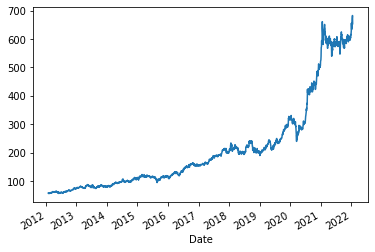

In [45]:
stock_df['Adj Close'].plot()
plt.show()

直條圖：

In [27]:
stock_df['Volume'][-100:]

Date
2020-10-12     9837999
2020-10-13     5410614
2020-10-14     2562860
2020-10-15     4550154
2020-10-16     3239005
                ...   
2021-03-05    14153461
2021-03-08    12052602
2021-03-09    13273932
2021-03-10     5338478
2021-03-11     9165793
Name: Volume, Length: 100, dtype: int64

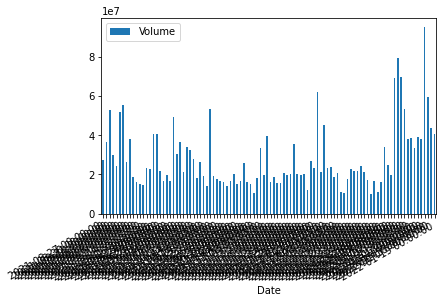

In [51]:
stock_df[['Volume']][-100:].plot(kind='bar')
plt.gcf().autofmt_xdate()
plt.show()

寫程式就是不斷地從別人的經驗中吸取教訓，所以像上述問題無法解決時，就要去找資料。

<https://stackoverflow.com/a/30135182/10871988>

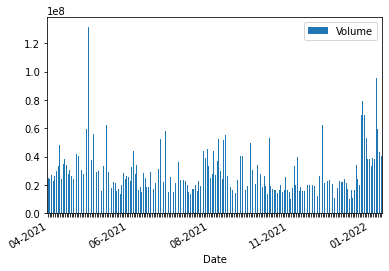

In [52]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

ax = stock_df[['Volume']][-200:].plot(kind='bar')

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(stock_df.iloc[-200:,].index)
# Every 4th ticklable shows the month and day
# ticklabels[::4] = [item.strftime('%b %d') for item in stock_df.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::48] = [item.strftime('%m-%Y') for item in stock_df.iloc[-200:,].index[::48]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()

In [58]:
volume_df = stock_df.resample('MS')['Volume'].sum()
display(volume_df.head())
display(volume_df.tail())

Date
2012-01-01    218478000
2012-02-01    905168000
2012-03-01    790116000
2012-04-01    711907000
2012-05-01    932111000
Freq: MS, Name: Volume, dtype: int64

Date
2021-09-01    572021433
2021-10-01    459873825
2021-11-01    498097435
2021-12-01    452423204
2022-01-01    696851257
Freq: MS, Name: Volume, dtype: int64

In [59]:
len(volume_df)

121

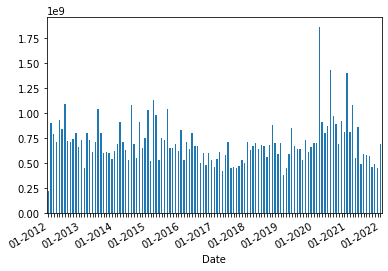

In [60]:
# fig, ax = plt.subplots()
ax = volume_df.plot(kind='bar')

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(volume_df.index)
# Every 4th ticklable shows the month and day
# ticklabels[::4] = [item.strftime('%b %d') for item in stock_df.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%m-%Y') for item in volume_df.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()

In [61]:
volume_df.index[::48]

DatetimeIndex(['2011-03-01', '2015-03-01', '2019-03-01'], dtype='datetime64[ns]', name='Date', freq='48MS')

#### 股市分析 DataFrame 實用函式（部分）

+ ffill: [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html) | 用來補足前一個欄位的空缺
+ describe: 用來「解釋」該 DataFrame
+ pct_change: [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) | 用來計算每一格的趴數變化

當然還有很多各式各樣的函式，各位可以參照 Pandas Document 裡頭的資料摸索一陣，或是可以上網下正確的關鍵字即可。多數問題都已經有被神通廣大的網友解決了。


In [68]:
stock_monthly_returns = stock_df['Adj Close'].resample('M').ffill().pct_change() * 100
stock_monthly_returns

Date
2012-01-31         NaN
2012-02-29    3.312090
2012-03-31    4.685588
2012-04-30    2.237918
2012-05-31   -1.958527
                ...   
2021-09-30   -5.107540
2021-10-31    1.724137
2021-11-30    1.016945
2021-12-31    3.663046
2022-01-31    6.341463
Freq: M, Name: Adj Close, Length: 121, dtype: float64

In [71]:
stock_yearly_returns = stock_df['Adj Close'].resample('Y').ffill().pct_change() * 100


stock_yearly_returns.index = stock_yearly_returns.index.strftime('%Y') #將 index 的 dateformat 改成‘年’
display(stock_yearly_returns)
stock_daily_return = stock_df['Adj Close'].ffill().pct_change()
display(stock_daily_return)

Date
2012          NaN
2013    11.811850
2014    36.652557
2015     4.643671
2016    31.900446
2017    30.661158
2018     1.838200
2019    53.929294
2020    64.667325
2021    18.069987
2022     6.341463
Name: Adj Close, dtype: float64

Date
2012-01-30         NaN
2012-01-31   -0.002541
2012-02-01   -0.019108
2012-02-02   -0.002597
2012-02-03   -0.007812
                ...   
2022-01-13    0.001515
2022-01-14    0.016641
2022-01-17    0.016369
2022-01-18   -0.030747
2022-01-19   -0.012085
Name: Adj Close, Length: 2447, dtype: float64

還記得剛剛所建立的 `stock_obj` 嗎？其實我們可以從中獲得許多資訊。

In [72]:
stock_obj.info

{'zip': '300-78',
 'sector': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited manufactures and sells integrated circuits and semiconductors. It also offers customer service, account management, and engineering services. The company serves customers in computer, communications, consumer, and industrial and standard segments in North America, Europe, Japan, China, and South Korea. Taiwan Semiconductor Manufacturing Company Limited was founded in 1987 and is headquartered in HsinChu, Taiwan.',
 'city': 'Hsinchu City',
 'phone': '886 3 563 6688',
 'country': 'Taiwan',
 'companyOfficers': [],
 'website': 'https://www.tsmc.com',
 'maxAge': 1,
 'address1': 'Hsinchu Science Park',
 'fax': '886 3 563 7000',
 'industry': 'Semiconductors',
 'address2': 'No. 8, Li-Hsin Road 6',
 'ebitdaMargins': 0.68002,
 'profitMargins': 0.37932998,
 'grossMargins': 0.51897997,
 'operatingCashflow': 993091977216,
 'revenueGrowth': 0.212,
 'operatingMargins': 0.41344002,
 '

In [73]:
stock_obj.info['longName']

'Taiwan Semiconductor Manufacturing Company Limited'

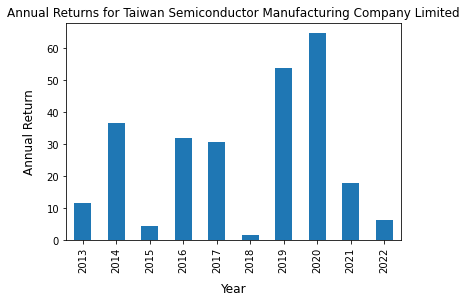

In [76]:
stock_yearly_returns.dropna().plot(kind='bar')
plt.xlabel('Year', fontsize="large", labelpad=10)
plt.ylabel('Annual Return', fontsize="large", labelpad=10)
plt.title(f'Annual Returns for {stock_obj.info["longName"]}')
plt.show()

可以透過以下方式獲得利率，需要注意的是，這不見得會每次都正確。像 0050 的資料就不齊全：

In [77]:
print(stock_obj.info['dividendRate'])
stock_obj.dividends

11


Date
2012-07-04    2.999481
2013-07-03    2.999552
2014-07-14    2.999912
2015-06-29    4.499875
2016-06-27    6.000000
2017-06-26    7.000000
2018-06-25    8.000000
2019-06-24    8.000000
2019-09-19    2.000000
2019-12-19    2.500000
2020-03-19    2.500000
2020-06-18    2.500000
2020-09-17    2.500000
2020-12-17    2.500000
2021-03-17    2.500000
2021-06-17    2.500000
2021-09-16    2.750000
2021-12-16    2.750000
Name: Dividends, dtype: float64

In [78]:
tmp_stock_obj = yf.Ticker('0050.TW')
tmp_stock_obj.info['dividendRate']

KeyError: 'dividendRate'

In [ ]:
tmp_stock_obj

這時候有兩種方式解決此問題：

1. 是不是其他台股也有出相關套件？([Fugle](https://developer.fugle.tw)、[twstock](https://github.com/mlouielu/twstock)、[Finlab](https://ai.finlab.tw/document/)等都有不錯的套件可以參考)
2. 自己實作一個爬蟲工具，讓我們自己去爬資料，這樣就不會被限制了

我們接下來馬上跳到 Bonus Section 看看如何實作吧！

#

## matplotlib

剛剛直接用 `DataFrame.plot()` 的方式製圖，其實背後都是使用到 matplotlib 套件。之後在做更複雜的分析時，我們會發現有時候單用 DataFrame 製圖會比較沒效率。

那我們就再示範一次折線圖以及直條圖的畫法：

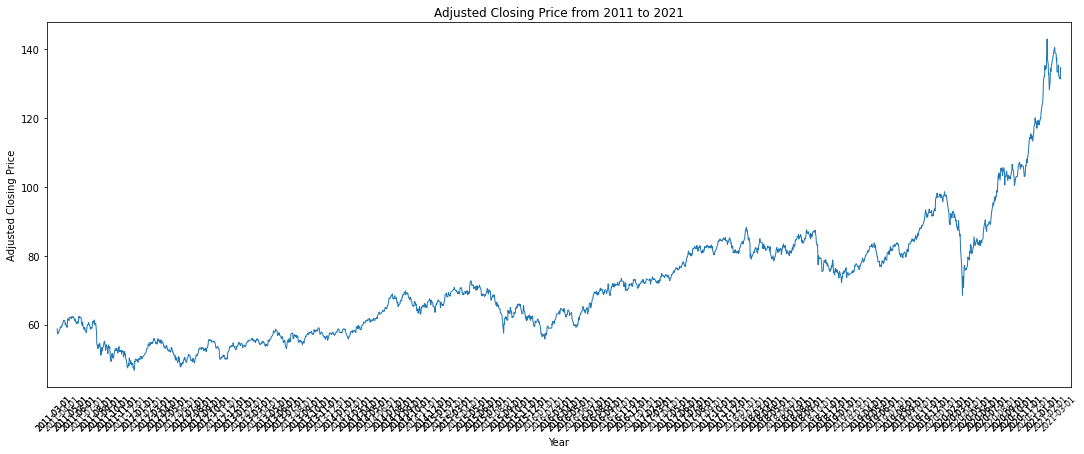

In [8]:
# stock_df[['Adj Close']].plot()

n = stock_df[['Adj Close']].shape[0]
year = stock_df.index.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(stock_df.index, stock_df['Adj Close'], '-', linewidth=1, markersize=5)
plt.xticks(year, rotation=45, fontsize=8)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off

plt.margins(x=.01, tight=False)

fig.tight_layout()
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Price')
plt.title(f'Adjusted Closing Price from {stock_df.index[0].strftime("%Y")} to {stock_df.index[-1].strftime("%Y")}')
plt.show()

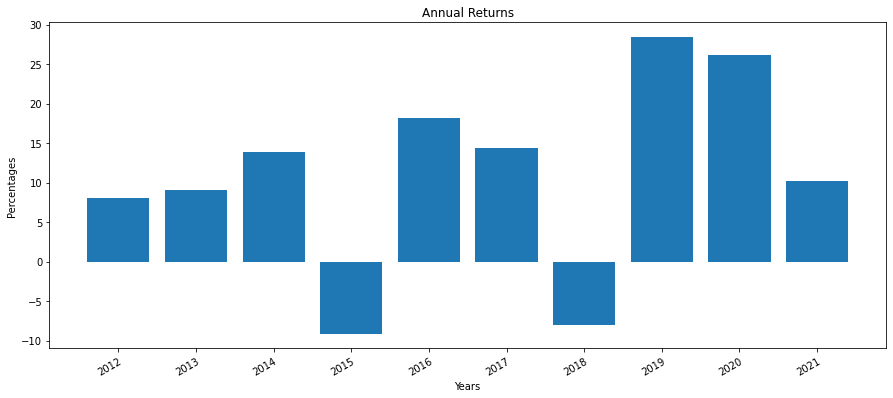

In [117]:
fig, ax = plt.subplots(figsize=(15,6))

rect = ax.bar(stock_yearly_returns.dropna().index, stock_yearly_returns.dropna().values, width=0.8, bottom=None, align='center')

ax.set_title("Annual Returns")
ax.set_xlabel("Years")
ax.set_ylabel("Percentages")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",rotation_mode="anchor")

plt.show()

大概是醬！如果待會兒實作有什麼想法，但畫不出來，也不確定如何下關鍵字的話，歡迎提出來一起討論。